# Ensemble
A group of predictors is called an Ensemble.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Creates and trains a voting classifier composed of three diverse classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [11]:
# Obtain the accuracy 
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


### Soft Voting
If all classifiers are able to estimate class probabilities (i.e., they have a pre dict_proba() method), then you can tell scikit-learn to predict the class with the highest probability, averaged over all the individual classifiers. <br>
This is called Soft Voting.<br>
Soft Voting often achieves higher performance than hard voting because it gives more weight to highly confident votes. <br>
Simpyl change voting='soft'. SVC class does not have this by default, so we must use hard.

# Bagging and Pasting

Bagging - When sampling is performed with replacement (bagging short for bootstrap aggregating)<br>
Pasting - When sampling is performed without replacement<br>
<img src="../img/bagging_pasting.png" alt="Bagging and Pasting" style="width: 500px;"/><br>



In [12]:
# Scikit-Learn simple API for bagging and regression (BaggingClassifer and BaggingRegressor)
# Trains ensemble of 500 decision tree classifiers, each trained on 100 training instances randomly
# Sampled from the training set with replacement (set bootstrap=False for pasting)
# BaggingClassifier automaticaly performs soft voting instead of hard voting.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.928


0.856


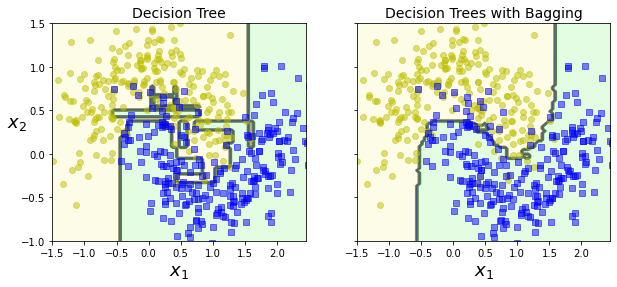

In [14]:
# Creates a Decision tree classifier and compares it too the above code for example.

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

# Out-of-Bag Evaluation
Using bagging, only about 63% of the training stances are sampled on average for each predictor. The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. They are not the same 37% for all predictors.

Setting oob_score=True when creating a Bagging Classifer to request an automatic oob evaluation after training.


In [15]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=1, oob_score=True
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.904

In [16]:
# According to the oob_score, the BaggingClassifier is likely to achieve about 90.5% accuracy
# on the test set. We can verify this by:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)
# We got 89.6%, pretty close


0.896

# Random Patches and Random Subspaces
Bagging classifier supports sampling the features, and can be controlled by two hyperparametersL max_features and bootstrap_features. <br>
They work the same way as max_samples and bootstrap, but for feature sampling instead of instance sampling. Thus each predictor will be trained on a random subset of input features.<br>



# Random Forests
An ensemble of Devision Trees, generally trained via the bagging method (sometimes pasting). max_sampels is set to the size of the training set.Instead of creating a bagging classifier and passing it devisiontreeclassifer, you can just use RandomForestClassifier class (or RandomForestRegressor). It has all the functionality of BaggingClassifier and DevisionTreeClassifer.<br>
<br>
Random Forest algorithm introduces extra randomenss when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better model

In [18]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

### Extra-Trees
A forest of extremely random trees is called an Extremely Randomized Tree ensemble (or Extra-Trees for short). This trades more bias for lower variance. It also makes Extra-Trees faster to train that Random Forest since finding the best possible threshold for each feature at every node is one of the most time-consuming tasks of growing a tree.
<br>
<br>
you can create an Extra-Tree classifer using ExtraTreesClassifier class. Also ExtraTreesRegressor

### Feature Importance
A great quality of Random Forests is making it easy to measure relative importance of each feature. Scikit-Learn measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). It is a weighted average, where each node's weight is equal to the number of training samples that are associate with it. <br>
<br>
Scikit-Learn computers this score automatically for each feature after training. Then it scales the results so that the sum of all importances is equal to 1. You can access and see results using the feature_importances_ vriable. For the iris dataset, it seems the most important feature are petal length(44%) and width (42%). Sepal length and width are (11% and 2% respectively).<br>

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10475773903404266
sepal width (cm) 0.024453831378568554
petal length (cm) 0.42361970334081767
petal width (cm) 0.44716872624657117


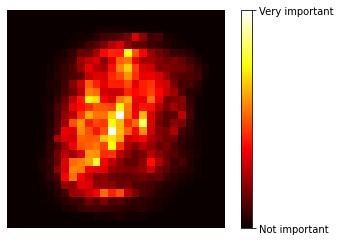

In [25]:
# Generating MNIST pixel information to show pixel importance
from sklearn.datasets import fetch_openml
import matplotlib as mpl

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

# Boosting
Boosting - refers to any Ensemble method that can combine several weak learners into a strong learner. Train predictors sequentially, each trying to correct it's predecessor. Adaboost and Gradient boost are most popular forms.<br>
<br>
### AdaBoost
<img src="../img/adaboost.png" alt="AdaBoost" style="width: 500px;"/><br>

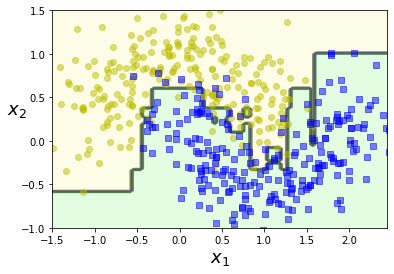

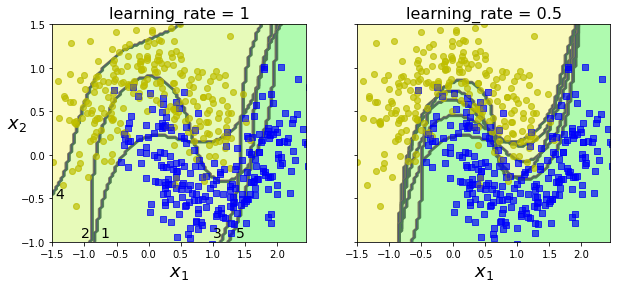

In [26]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

plot_decision_boundary(ada_clf, X, y)

m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum() # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r) # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha) # equation 7-3
        sample_weights /= sample_weights.sum() # normalization step

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

### Gradient Boost
This algorithm works by seuquentially adding predictors to an ensemble, each one correcting it's predecessor (Just like AdaBoost). However, instead of tweaking the instance weights at every iteration, this method triest to fit the new predictor to the residual errors made by the previous predictor.

In [27]:
# Creating simple quadtratic dataset
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

#Train a devision tree regressor on dataset
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

X_new = np.array([[0.8]])

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

y_pred

array([0.75026781])

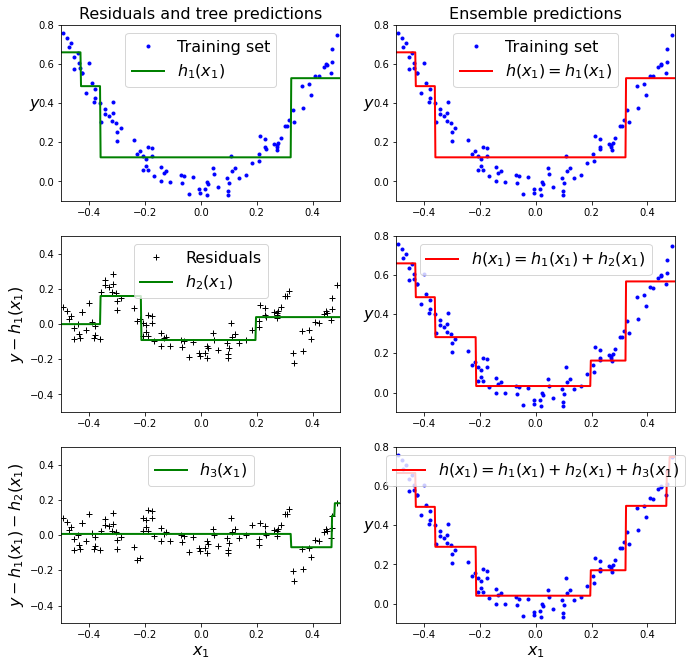

In [29]:
# In this depiction of Gradient Boosting, the first predictor (top left) is trained normally,
#  then each consecutive predictor (middle left and lower left) is trained on the previous predictor’s residuals;
#  the right column shows the resulting ensemble’s predictions:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [30]:
# Easy way to find the optimal number of trees, you can use early stopping.
# Use staged_predict() method: it returns an iterator over the predictions made by the ensemble of each stage of trainign (with one tree, two tree, etc.)

# The code belows trains a GBRY ensemble with 120 trees, then measures the validation error at each stage of trainign to find the optimal number of trees,
# and finally trains another GBRY ensemble using the optimal number of trees

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)



GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

# Stacking
Short for Stacked Generalization.
Stacking - instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble, we train a model to perform this aggregation.<br>
<img src="../img/stacking.png" alt="Stacking" style="width: 500px;"/><br>
<br>
To train the blender, a common approach is to use a hold-out set.<br>
<img src="../img/first_layer_stack.png" alt="Training first layer" style="width: 500px;"/><br>
<br>
The first layer predictors are used to make predictions on the second (held-out) set. Ensures the predictions are "clean". For each instance in the hold-out set there are three predicted values. We can create  new training set using these predicted values as input features (which makes the new training set three-dimensional) and keeping the target values. The blender is trained on this new training set, so it learns to precit the target value given the first layer's predictions. <br>
<img src="../img/train_blender.png" alt="Training the Blender" style="width: 500px;"/><br>
<br>
Possible to train several different blenders this way (e.g., one using LinearRegressing and another using RandomForestRegression, etc.): we get a whole layer of blenders. We must split the trainign set into three subsets. The first is used to train the first layer, and the second is used to create the training set used to train the second layer (using predictions made by the predictors of the first layer). The third is used to create the training set to train the third layer (using predictions made by the predictors of the second layer). Once this is done, we can make a prediciton for a new instance by going through each layer sequentially.<br>
<img src="../img/multilayer_stacking.png" alt="Using Multilayer Stacking ensemble" style="width: 500px;"/><br>




